In [12]:
!pip install azure-storage-blob

In [13]:
#!pip install azure-storage-blob

import pandas as pd
from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

connection_string = "DefaultEndpointsProtocol=https;AccountName=mloblistorage;AccountKey=u+SGxSxdN+0KtUq2qwRS2zD+Ul4hBnt+nhAzPok53QggOuXa9+5V3VU8NDHiGmG2zN+ghQ7V+AtY+ASt8kPFcA==;EndpointSuffix=core.windows.net"
container_name ="mloblistoragecontainer"
blob_name = "properties_tienda_inglesa.csv"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

data = StringIO(csv_data)
df = pd.read_csv(data, header=None, names=['id','image_urls','images','link','product_name','property_type','source','url'])
#id,image_urls,images,link,product_name,property_type,source,url

valid_categories=[
            "CLEANING",
            ]


In [14]:
df = df_filtrado = df.query('property_type in @valid_categories')
df = df[~df['id'].duplicated()]
df

,id,image_urls,images,link,product_name,property_type,source,url
4,86019,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Pizza-con-Muz...,Pizza con Muzzarella y Tomate Pack Familiar SI...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Pizza-con-Muz...
13756,545467,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Empanadas-de-...,Empanadas de Carne TIENDA INGLESA x 6 Unidades...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Empanadas-de-...
13758,43379,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Medallones-de...,Medallones de Merluza Rebozados TIENDA INGLESA...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Medallones-de...
13759,14190,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Empanadas-x-9...,Empanadas x 9 de Jamón Cocido y Queso HAMBY 63...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Empanadas-x-9...
13760,23895,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Choclo-en-Gra...,Choclo en Grano BUFFET 500 gr,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Choclo-en-Gra...
...,...,...,...,...,...,...,...,...
14166,490,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Papas-Noisett...,Papas Noisettes Congeladas MC CAIN 1 Kg,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Papas-Noisett...
14167,414560,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Nuggets-de-Po...,Nuggets de Pollo Crocantes SADIA 900 gr,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Nuggets-de-Po...
14168,487319,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Hamburguesa-E...,Hamburguesa Extra TIENDA INGLESA 12 Unidades 1 Kg,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Hamburguesa-E...
14169,545472,https://prod-resize.tiendainglesa.com.uy/image...,[{'url': 'https://prod-resize.tiendainglesa.co...,https://www.tiendainglesa.com.uy/Empanadas-de-...,Empanadas de Espinaca y Queso TIENDA INGLESA x...,CLEANING,tienda_inglesa,https://www.tiendainglesa.com.uy/Empanadas-de-...


In [15]:
def get_image_from_blob(blob_client):
    stream = io.BytesIO()
    download_stream = blob_client.download_blob()
    stream.write(download_stream.readall())

    stream.seek(0)
    image = Image.open(stream)
    return image


In [16]:
def show_image(blob_client, blob_name):

    image = get_image_from_blob(blob_client, blob_name)

    plt.imshow(image)
    plt.show()


In [17]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt

try:
    blob_service_client = BlobServiceClient.from_connection_string(connection_string)
    blob_name = 'full/0094e2445afde938bd97477f21149e43101f1ebf.jpg'
    blob_client = blob_service_client.get_blob_client(container_name, blob_name)

    show_image(blob_client, blob_name)

except Exception as ex:
    print('Exception:')
    print(ex)

Exception:
get_image_from_blob() takes 1 positional argument but 2 were given


In [18]:
import ast

image_ids=[]
images =[]
count=1;
for index, row in df.iterrows():
    lista_json = row['images']
    b=ast.literal_eval(lista_json[1:-1])
    path =  b.get("path")

    blob_client = blob_service_client.get_blob_client(container_name, path)


    images.append(get_image_from_blob(blob_client))

    image_ids.append(row['id'])
    if count%100==0:
      print(f"Load {count} images of {df.shape[0]}")
    count+=1



Load 100 images of 415
Load 200 images of 415
Load 300 images of 415
Load 400 images of 415


In [19]:
import tensorflow as tf
from PIL import Image

def convert_image_to_example(image, image_id):
    feature = {
        'id': tf.train.Feature(bytes_list=tf.train.BytesList(value=[str(image_id).encode()])),
        'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image.tobytes()])),
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

def save_images_to_tfrecords(images, image_ids, output_file):
    with tf.io.TFRecordWriter(output_file) as writer:
        for image, image_id in zip(images, image_ids):
            tf_example = convert_image_to_example(image, image_id)
            writer.write(tf_example)


# Guardar las imagenes y sus IDs en un archivo TFRecords
save_images_to_tfrecords(images, image_ids, 'images.tfrecords')



In [20]:
# Función para leer un archivo TFRecords y recuperar las imágenes y sus IDs
def read_images_from_tfrecords(input_file):
    raw_dataset = tf.data.TFRecordDataset(input_file)
    count=0
    for _ in raw_dataset:
      count+=1

    print(count)
    feature_description = {
        'id': tf.io.FixedLenFeature([], tf.string),
        'image': tf.io.FixedLenFeature([], tf.string),
    }

    def parse_tfrecord_fn(record):
        example = tf.io.parse_single_example(record, feature_description)
        image = tf.io.decode_image(example['image'])
        image_id = example['id']
        return image, image_id

    dataset = raw_dataset.map(parse_tfrecord_fn)

    images = []
    image_ids = []

    for raw_record in raw_dataset:
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        image_bytes = example.features.feature['image'].bytes_list.value[0]
        image = Image.frombytes('RGB', (600, 400), image_bytes)

        image_id = example.features.feature['id'].bytes_list.value[0].decode()
        images.append(image)



    return images, image_ids




# Leer el archivo TFRecords y recuperar las imágenes y sus IDs
loaded_images, loaded_image_ids = read_images_from_tfrecords('images.tfrecords')

415


In [23]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F764182BA00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F75D6DF2860>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F7641861750>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F764182B040>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F764182B280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F75D42250C0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F75D6BE0DC0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F75D6DF3700>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F7671BB7BE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F7641829D20>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F75D6DF33A0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400 at 0x7F76418

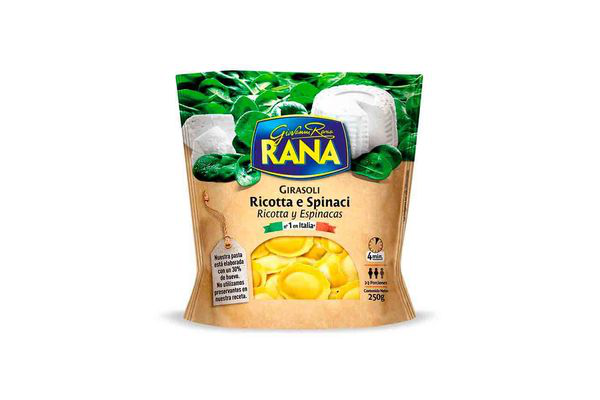

[<PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D4251A50>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D42524D0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F7641863BB0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D4225150>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F764182BAF0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D4251840>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D42537F0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425DED0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425D1E0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425D6C0>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425F640>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425C520>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425E650>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425D300>,
 <PIL.Image.Image image mode=RGB size=600x400 at 0x7F75D425E800>,
 <PIL.Imag

In [26]:
loaded_images[11].show()
loaded_images